In [41]:
# import libraries

import pandas as pd
import requests
import time
import numpy as np
from scipy.stats import linregress
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime


In [23]:
# read raw csv files
raw_seated_diners = pd.read_csv('input_data/YoY_Seated_Diner_Data.csv')

raw_state_cases = pd.read_csv('input_data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

raw_country_cases = pd.read_csv('input_data/case_daily_trends__united_states.csv',skiprows =3)

#confirm that rows were skipped on upload
raw_country_cases

,Date,New Cases,7-Day Moving Avg
0,Feb 9 2021,91034,107632
1,Feb 8 2021,86706,111329
2,Feb 7 2021,91762,116904
3,Feb 6 2021,107489,119906
4,Feb 5 2021,130261,124773
...,...,...,...
380,Jan 26 2020,3,0
381,Jan 25 2020,0,0
382,Jan 24 2020,1,0
383,Jan 23 2020,0,0


In [24]:
# sort raw country cases to align dates to later merge on index

raw_country_cases['Date'] = pd.to_datetime(raw_country_cases['Date'])

sorted_country_cases = raw_country_cases.sort_values(by = ['Date'], ascending = True)

sorted_country_cases

,Date,New Cases,7-Day Moving Avg
384,2020-01-22,1,0
383,2020-01-23,0,0
382,2020-01-24,1,0
381,2020-01-25,0,0
380,2020-01-26,3,0
...,...,...,...
4,2021-02-05,130261,124773
3,2021-02-06,107489,119906
2,2021-02-07,91762,116904
1,2021-02-08,86706,111329


In [25]:
# drop rows with mismatched dates and reset index

sorted_country_cases.reset_index(inplace=True, drop = True)

slim_country_cases = sorted_country_cases.drop(sorted_country_cases.index[0:27])

slim_country_cases.reset_index(inplace=True, drop = True)

slim_country_cases


,Date,New Cases,7-Day Moving Avg
0,2020-02-18,0,0
1,2020-02-19,0,0
2,2020-02-20,0,0
3,2020-02-21,2,0
4,2020-02-22,0,0
...,...,...,...
353,2021-02-05,130261,124773
354,2021-02-06,107489,119906
355,2021-02-07,91762,116904
356,2021-02-08,86706,111329


In [26]:
# create OpenTable country df
seated_diners_country = raw_seated_diners.loc[raw_seated_diners["Type"]=="country"]

seated_diners_country

,Type,Name,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,...,31-Jan,1-Feb,2-Feb,3-Feb,4-Feb,5-Feb,6-Feb,7-Feb,8-Feb,9-Feb
0,country,Global,-1.0,3.0,-1.0,-2.0,1.0,4.0,1.0,1.0,...,-36.78,-65.67,-65.19,-61.28,-57.32,-49.00,-47.01,-66.89,-60.98,-62.57
1,country,Australia,-3.0,-6.0,-3.0,-1.0,0.0,0.0,0.0,-2.0,...,83.31,39.50,49.74,61.33,72.21,77.40,95.85,100.09,72.52,56.08
2,country,Canada,-5.0,0.0,-3.0,-2.0,-1.0,8.0,-2.0,-3.0,...,-77.49,-83.83,-85.02,-83.07,-85.27,-79.97,-80.54,-80.18,-72.28,-76.22
3,country,Germany,11.0,4.0,3.0,5.0,1.0,2.0,11.0,4.0,...,-99.62,-99.75,-99.72,-99.67,-99.59,-99.42,-99.19,-99.75,-99.92,-99.48
4,country,Ireland,2.0,0.0,4.0,1.0,-3.0,4.0,-9.0,-8.0,...,-99.84,-100.00,-100.00,-100.00,-99.91,-99.83,-99.16,-99.93,-99.89,-99.98
5,country,Mexico,-5.0,-5.0,-4.0,-3.0,-1.0,2.0,-1.0,-3.0,...,-46.38,-54.53,-61.39,-64.40,-62.66,-57.15,-52.77,-68.10,-60.25,-60.22
6,country,United Kingdom,1.0,-1.0,-2.0,0.0,-1.0,-4.0,-6.0,-5.0,...,-99.76,-99.83,-99.83,-99.90,-99.88,-99.73,-99.63,-99.78,-99.81,-99.80
7,country,United States,0.0,4.0,0.0,-1.0,2.0,6.0,2.0,2.0,...,-23.52,-62.56,-61.23,-56.66,-51.62,-43.02,-41.57,-65.83,-57.92,-59.32


In [27]:
# filter to U.S. only

seated_diners_us = seated_diners_country.loc[seated_diners_country['Name']=='United States']

seated_diners_us_slim = seated_diners_us.drop(columns = ['Type','Name'])

# transpose the df to be joined

flipped_us = seated_diners_us_slim.transpose()

final_us = flipped_us.reset_index()

final_us.rename(columns={'index': 'Date', 7: 'Percent Change in Seated Diners'}, inplace=True)

final_us



,Date,Percent Change in Seated Diners
0,18-Feb,0.00
1,19-Feb,4.00
2,20-Feb,0.00
3,21-Feb,-1.00
4,22-Feb,2.00
...,...,...
353,5-Feb,-43.02
354,6-Feb,-41.57
355,7-Feb,-65.83
356,8-Feb,-57.92


In [28]:
# merge the two data frames by index to line up dates
combined_df = pd.merge(slim_country_cases, final_us, left_index=True, right_index=True, how = 'outer')

combined_df

,Date_x,New Cases,7-Day Moving Avg,Date_y,Percent Change in Seated Diners
0,2020-02-18,0,0,18-Feb,0.00
1,2020-02-19,0,0,19-Feb,4.00
2,2020-02-20,0,0,20-Feb,0.00
3,2020-02-21,2,0,21-Feb,-1.00
4,2020-02-22,0,0,22-Feb,2.00
...,...,...,...,...,...
353,2021-02-05,130261,124773,5-Feb,-43.02
354,2021-02-06,107489,119906,6-Feb,-41.57
355,2021-02-07,91762,116904,7-Feb,-65.83
356,2021-02-08,86706,111329,8-Feb,-57.92


In [183]:
# remove the date_y column (not fomatted as date since year was not included)
slim_combined_df = combined_df.drop(columns=['Date_y'])

# rename the remaining date column and label the case column as cases
slim_combined_df2 = slim_combined_df.rename(columns = {'Date_x': 'Date','7-Day Moving Avg':'7-Day Moving Avg Cases'})

# drop rows to start data at March 1 (first month of COVID impact)
final_combined_df = slim_combined_df2.drop(slim_combined_df2.index[0:12])

# reset the index
final_combined_df.reset_index(inplace=True, drop = True)

#create final dataframe
final_combined_df

,Date,New Cases,7-Day Moving Avg Cases,Percent Change in Seated Diners
0,2020-03-01,6,2,2.00
1,2020-03-02,25,6,-7.00
2,2020-03-03,24,9,-9.00
3,2020-03-04,22,12,-5.00
4,2020-03-05,62,21,-5.00
...,...,...,...,...
341,2021-02-05,130261,124773,-43.02
342,2021-02-06,107489,119906,-41.57
343,2021-02-07,91762,116904,-65.83
344,2021-02-08,86706,111329,-57.92


Text(0, 0.5, 'YOY % Change in Seated Diners')

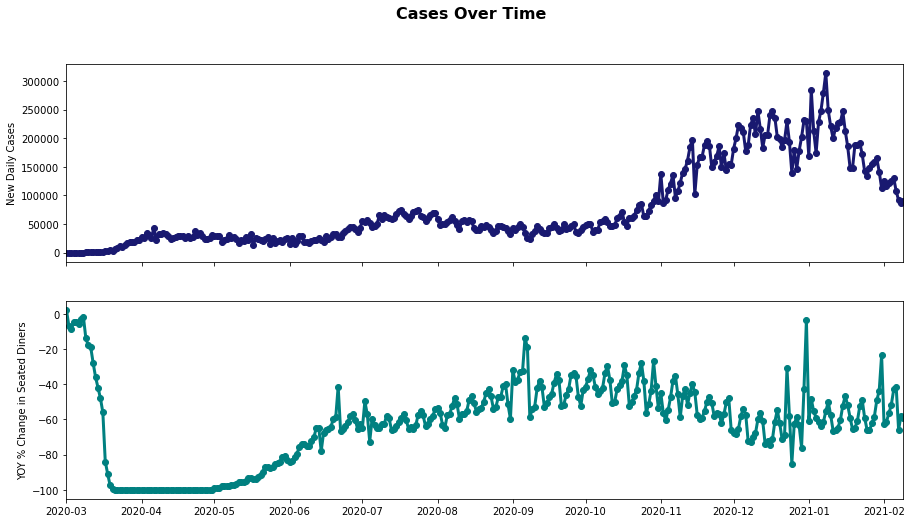

In [161]:
# create variables for data lists
cases = final_combined_df['New Cases']
date =  final_combined_df['Date']
diners = final_combined_df['Percent Change in Seated Diners']

# Generate a facet plot of figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(15, 8))

fig.suptitle("Cases Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(date), max(date))
ax1.plot(date, cases, linewidth=3, marker="o", color = "midnightblue")
ax1.set_ylabel("New Daily Cases")

ax2.plot(date, diners, linewidth=3, marker="o", color="teal")

ax2.set_ylabel("YOY % Change in Seated Diners")


In [125]:
# correlation of the national metrics for the entire data set

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(cases, diners)

tot_r

0.16265034035569279

In [212]:
# group dining data and case date by week in averages

# name a new df to avoid modifying final_combined_df
grouped_df = final_combined_df

# create a field for the week ending Saturday for a given date, and group by average
df = grouped_df.groupby(['Date', pd.Grouper(key='Date', freq='W-SAT')]).mean()

# reset the index to remove duplicate index
df.reset_index(level=0, inplace=True)

# delete the date column
del df["Date"]

# reset index again to make the new week field its own column and not the index
df.reset_index(level=0, inplace=True)

# rename the column to week 
week_df = df.rename(columns={"Date": "Week"})

# take the mean of all values grouped by week 
grouped_weeks = week_df.groupby(['Week']).mean()

# export to CSV for use in other parts of project
grouped_weeks.to_csv("../Output/Weekly Cases and Dining Data.csv")

grouped_weeks



,New Cases,7-Day Moving Avg Cases,Percent Change in Seated Diners,Change in 7-Day Moving Avg Cases
Week,,,,
2020-03-07,36.142857,16.285714,-4.714286,60.000000
2020-03-14,294.285714,169.285714,-22.714286,35.857143
2020-03-21,3194.000000,1532.428571,-82.254286,41.571429
2020-03-28,14025.000000,8740.714286,-99.971429,23.571429
2020-04-04,26000.285714,20578.714286,-99.985714,9.200000
2020-04-11,31523.714286,30242.000000,-99.985714,2.875714
2020-04-18,27877.428571,29369.142857,-99.977143,-1.685714
2020-04-25,29703.857143,28472.285714,-99.975714,0.910429
2020-05-02,27461.142857,28750.142857,-99.618571,-1.108571


Text(0, 0.5, 'YOY % Change in Seated Diners')

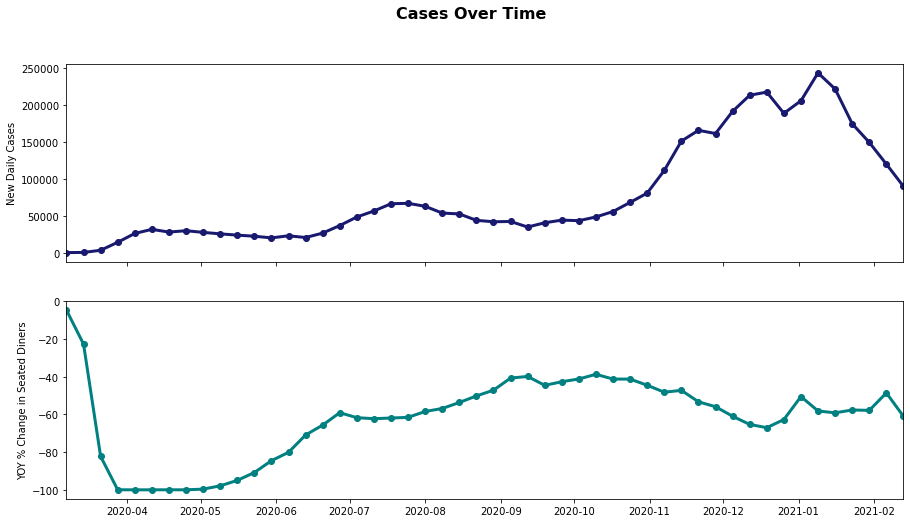

In [167]:
# create visuals with weekly data to remove some of the DOW volatility
grouped_weeks.reset_index(level=0, inplace=True)

# create variables for data lists
cases = grouped_weeks['New Cases']
date =  grouped_weeks['Week']
diners = grouped_weeks['Percent Change in Seated Diners']

# Generate a facet plot of all 3 figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 8))
fig.suptitle("Cases Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(date), max(date))
ax1.plot(date, cases, linewidth=3,marker="o",color = 'midnightblue')
#ax1.plot(date, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("New Daily Cases")

ax2.plot(date, diners, linewidth=3, marker="o", color="teal")
#ax2.plot(year, m_fit, "r--", linewidth=1)
ax2.set_ylabel("YOY % Change in Seated Diners")

In [184]:
# create measures/columns to show trends for both metrics

trend_df = final_combined_df

daily_change = []

for index,row in trend_df.iterrows():

    if index == 0:

        daily_change.append(0)
        
    else:
    
        yesterday = index - 1
    
        iter_value = ((trend_df.loc[index, "7-Day Moving Avg Cases"]/trend_df.loc[yesterday, "7-Day Moving Avg Cases"])-1)*100
    
        iter_percent = "{:.2}".format(iter_value)
        
        daily_change.append(iter_percent)   


trend_df['Change in 7-Day Moving Avg Cases'] = daily_change

trend_df["Change in 7-Day Moving Avg Cases"] = trend_df["Change in 7-Day Moving Avg Cases"].astype(float)

trend_df.dtypes

Date                                datetime64[ns]
New Cases                                    int64
7-Day Moving Avg Cases                       int64
Percent Change in Seated Diners            float64
Change in 7-Day Moving Avg Cases           float64
dtype: object

In [185]:
trend_cases = trend_df['Change in 7-Day Moving Avg Cases']
trend_diners = trend_df['Percent Change in Seated Diners']

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(trend_cases, trend_diners)

tot_r

0.18444075810652183

In [211]:
# create separate dataframes for separate months

#date_index_df = trend_df.set_index(['Date'])
date_index_df = grouped_df

spring_df = date_index_df.loc['2020-5-01':'2020-6-30']

summer_df = date_index_df.loc['2020-7-01':'2020-8-31']

fall_df = date_index_df.loc['2020-9-01':'2020-10-31']

holiday_df = date_index_df.loc['2020-11-01':'2020-12-31']

spring_df.head(30)


,Date,New Cases,7-Day Moving Avg Cases,Percent Change in Seated Diners,Week,Change in 7-Day Moving Avg Cases


In [206]:
spring_cases = spring_df['New Cases']
spring_diners = spring_df['Percent Change in Seated Diners']

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(spring_cases, spring_diners)

tot_r

0.4613209333248011

In [207]:
summer_cases = summer_df['New Cases']
summer_diners = summer_df['Percent Change in Seated Diners']

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(summer_cases, summer_diners)

tot_r

-0.41990330863544295

In [208]:
fall_cases = fall_df['New Cases']
fall_diners = fall_df['Percent Change in Seated Diners']

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(fall_cases, fall_diners)

tot_r

0.04850135195258859

In [209]:
holiday_cases = holiday_df['New Cases']
holiday_diners = holiday_df['Percent Change in Seated Diners']

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(holiday_cases, holiday_diners)

tot_r

-0.2006423825903604

In [198]:
# create OpenTable states df
seated_diners_states = raw_seated_diners.loc[raw_seated_diners["Type"]=="state"]

seated_diners_states

,Type,Name,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,...,31-Jan,1-Feb,2-Feb,3-Feb,4-Feb,5-Feb,6-Feb,7-Feb,8-Feb,9-Feb
8,state,Alabama,-14.0,7.0,1.0,-2.0,8.0,2.0,1.0,0.0,...,10.07,-50.69,-44.34,-25.85,-32.04,-26.10,-26.13,-50.15,-45.14,-43.75
9,state,Alberta,2.0,10.0,2.0,1.0,5.0,0.0,-1.0,3.0,...,-99.33,-100.00,-99.67,-100.00,-99.60,-99.94,-99.95,-99.91,-13.10,-35.99
10,state,Arizona,0.0,1.0,8.0,4.0,-3.0,5.0,2.0,5.0,...,17.05,-50.66,-42.01,-41.44,-34.35,-26.01,-22.00,-56.54,-42.17,-42.37
11,state,Baden-Württemberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.59,-99.93,-99.95,-100.00,-99.88,-99.89,-99.91,-99.87,-100.00,-99.63
12,state,Baja California Sur,-6.0,-2.0,-2.0,-9.0,1.0,1.0,29.0,6.0,...,-29.52,-55.50,-51.40,-48.37,-37.30,-37.04,-30.24,-48.75,-40.44,-35.33
13,state,Bavaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-99.48,-99.89,-99.87,-99.56,-99.76,-99.56,-99.01,-100.00,-100.00,-99.56
14,state,British Columbia,8.0,-3.0,1.0,6.0,3.0,-2.0,-3.0,-5.0,...,-33.66,-46.51,-33.41,-32.93,-45.85,-34.35,-33.07,-37.62,-47.29,-46.19
15,state,California,-2.0,2.0,5.0,0.0,-2.0,7.0,3.0,6.0,...,-36.22,-73.53,-71.35,-70.57,-65.04,-55.70,-52.61,-69.86,-71.63,-71.68
16,state,Colorado,1.0,-8.0,-4.0,7.0,1.0,-8.0,-2.0,-4.0,...,31.93,-33.07,-30.90,-45.35,-36.98,-11.73,-27.69,-50.79,-43.58,-45.00
17,state,Connecticut,8.0,26.0,1.0,-3.0,-6.0,2.0,-2.0,6.0,...,-5.03,-94.18,-74.17,-54.14,-33.61,-32.07,-32.07,-79.47,-52.15,-67.93
